In [2]:
#@title 🤗 AutoTrain DreamBooth
#@markdown In order to use this colab
#@markdown - upload images to a folder named `images/`
#@markdown - choose a project name if you wish
#@markdown - change model if you wish, you can also select sd2/2.1 or sd1.5
#@markdown - update prompt and remember it. choose keywords that don't usually appear in dictionaries
#@markdown - add huggingface information (token and repo_id) if you wish to push trained model to huggingface hub
#@markdown - update hyperparameters if you wish
#@markdown - click `Runtime > Run all` or run each cell individually

import os
!pip install -U autotrain-advanced > install_logs.txt

In [3]:
!autotrain setup > setup_logs.txt

> WARNING ❌ Some DreamBooth components are missing! Please run `autotrain setup` to install it. Ignore this warning if you are not using DreamBooth or running `autotrain setup` already.
> INFO    Installing latest transformers@main
> INFO    Successfully installed latest transformers
> INFO    Installing latest peft@main
> INFO    Successfully installed latest peft
> INFO    Installing latest diffusers@main
> INFO    Successfully installed latest diffusers
> INFO    Installing latest trl@main
> INFO    Successfully installed latest trl
> INFO    Installing latest xformers
> INFO    Successfully installed latest xformers


In [4]:
!pip install diffusers --upgrade
!pip install invisible_watermark transformers accelerate safetensors

In [5]:
#@markdown ---
#@markdown #### Project Config
project_name = 'bpatel117' # @param {type:"string"}
model_name = 'stabilityai/stable-diffusion-xl-base-1.0' # @param ["stabilityai/stable-diffusion-xl-base-1.0", "runwayml/stable-diffusion-v1-5", "stabilityai/stable-diffusion-2-1", "stabilityai/stable-diffusion-2-1-base"]
prompt = 'photo of bpatel117' # @param {type: "string"}

#@markdown ---
#@markdown #### Push to Hub?
#@markdown Use these only if you want to push your trained model to a private repo in your Hugging Face Account
#@markdown If you dont use these, the model will be saved in Google Colab and you are required to download it manually.
#@markdown Please enter your Hugging Face write token. The trained model will be saved to your Hugging Face account.
#@markdown You can find your token here: https://huggingface.co/settings/tokens
push_to_hub = False # @param ["False", "True"] {type:"raw"}
hf_token = "hf_XXX" #@param {type:"string"}
repo_id = "username/repo_name" #@param {type:"string"}

#@markdown ---
#@markdown #### Hyperparameters
learning_rate = 1e-4 # @param {type:"number"}
num_steps = 500 #@param {type:"number"}
batch_size = 1 # @param {type:"slider", min:1, max:32, step:1}
gradient_accumulation = 4 # @param {type:"slider", min:1, max:32, step:1}
resolution = 1024 # @param {type:"slider", min:128, max:1024, step:128}
use_8bit_adam = True # @param ["False", "True"] {type:"raw"}
use_xformers = True # @param ["False", "True"] {type:"raw"}
use_fp16 = True # @param ["False", "True"] {type:"raw"}
train_text_encoder = False # @param ["False", "True"] {type:"raw"}
gradient_checkpointing = True # @param ["False", "True"] {type:"raw"}

os.environ["PROJECT_NAME"] = project_name
os.environ["MODEL_NAME"] = model_name
os.environ["PROMPT"] = prompt
os.environ["PUSH_TO_HUB"] = str(push_to_hub)
os.environ["HF_TOKEN"] = hf_token
os.environ["REPO_ID"] = repo_id
os.environ["LEARNING_RATE"] = str(learning_rate)
os.environ["NUM_STEPS"] = str(num_steps)
os.environ["BATCH_SIZE"] = str(batch_size)
os.environ["GRADIENT_ACCUMULATION"] = str(gradient_accumulation)
os.environ["RESOLUTION"] = str(resolution)
os.environ["USE_8BIT_ADAM"] = str(use_8bit_adam)
os.environ["USE_XFORMERS"] = str(use_xformers)
os.environ["USE_FP16"] = str(use_fp16)
os.environ["TRAIN_TEXT_ENCODER"] = str(train_text_encoder)
os.environ["GRADIENT_CHECKPOINTING"] = str(gradient_checkpointing)

In [6]:
# !autotrain dreambooth \
# --model ${MODEL_NAME} \
# --output ${PROJECT_NAME} \
# --image-path images/ \
# --prompt "${PROMPT}" \
# --resolution ${RESOLUTION} \
# --batch-size ${BATCH_SIZE} \
# --num-steps ${NUM_STEPS} \
# --gradient-accumulation ${GRADIENT_ACCUMULATION} \
# --lr ${LEARNING_RATE} \
# $( [[ "$USE_FP16" == "True" ]] && echo "--fp16" ) \
# $( [[ "$USE_XFORMERS" == "True" ]] && echo "--xformers" ) \
# $( [[ "$TRAIN_TEXT_ENCODER" == "True" ]] && echo "--train-text-encoder" ) \
# $( [[ "$USE_8BIT_ADAM" == "True" ]] && echo "--use-8bit-adam" ) \
# $( [[ "$GRADIENT_CHECKPOINTING" == "True" ]] && echo "--gradient-checkpointing" ) \
# $( [[ "$PUSH_TO_HUB" == "True" ]] && echo "--push-to-hub --hub-token ${HF_TOKEN} --hub-model-id ${REPO_ID}" )

In [7]:
!pip install invisible_watermark transformers accelerate safetensors

In [8]:
!pip install diffusers --upgrade

In [9]:
!apt-get update && apt-get install ffmpeg libsm6 libxext6  -y

Hit:1 http://deb.debian.org/debian bullseye InRelease
Hit:2 http://deb.debian.org/debian bullseye-updates InRelease
Hit:3 http://security.debian.org/debian-security bullseye-security InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libsm6 is already the newest version (2:1.2.3-1).
libxext6 is already the newest version (2:1.3.3-1.1).
ffmpeg is already the newest version (7:4.3.6-0+deb11u1).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.


In [10]:
!pwd

/root/Ankit


In [ ]:
# Inference
# this is the inference code that you can use after you have trained your model
# Unhide code below and change prj_path to your repo or local path (e.g. my_dreambooth_project)



from diffusers import DiffusionPipeline, StableDiffusionXLImg2ImgPipeline
import torch

prj_path = "bpatel117"
model = "stabilityai/stable-diffusion-xl-base-1.0"
pipe = DiffusionPipeline.from_pretrained(
    model,
    torch_dtype=torch.float16,
)
pipe.to("cuda")
pipe.load_lora_weights(prj_path, weight_name="pytorch_lora_weights.safetensors")

refiner = StableDiffusionXLImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0",
    torch_dtype=torch.float16,
)
refiner.to("cuda")

prompt = "photo of a bpatel117 with Narendra Modi, acting headshot"

seed = 42
generator = torch.Generator("cuda").manual_seed(seed)
image = pipe(prompt=prompt, generator=generator).images[0]
image = refiner(prompt=prompt, generator=generator, image=image).images[0]
image.save(f"generated_image.png")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def display_img_and_prompt(images, prompt):
    """Display hallucinated image."""
    plt.figure(figsize=(12, 12))
    plt.imshow(np.array(images))
    plt.axis("off")
    # plt.title("AI - Generated Image")
    plt.show()

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

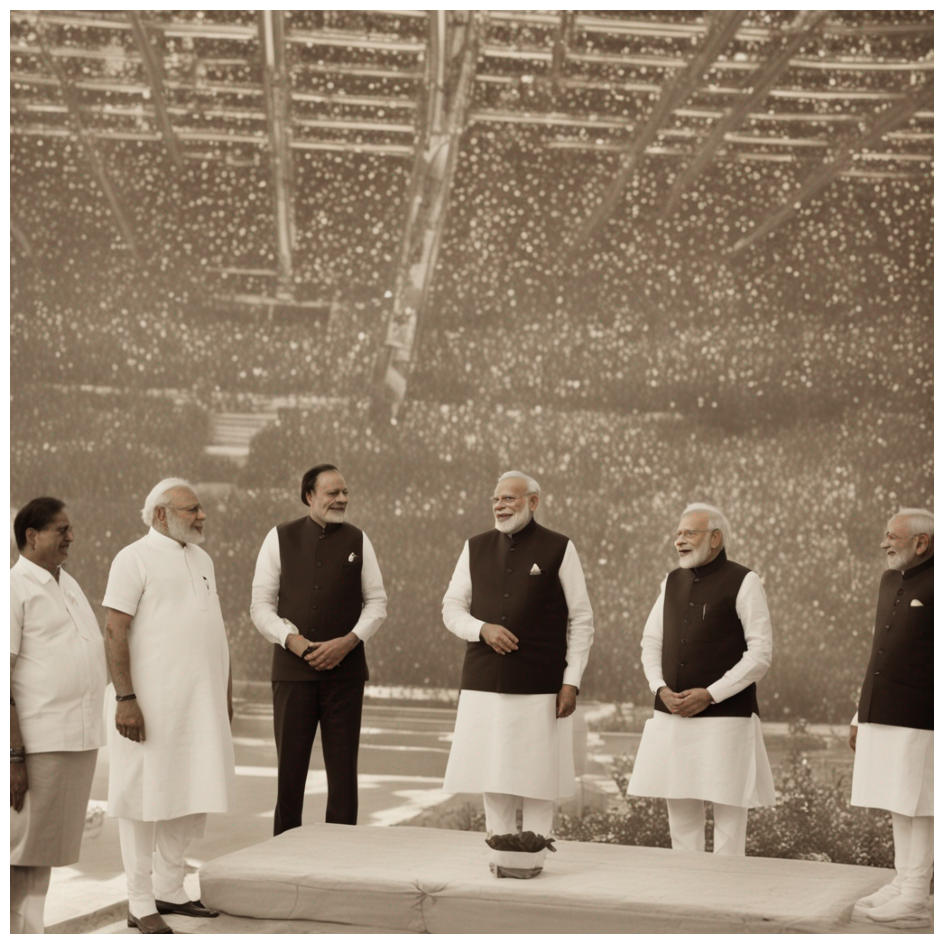

In [ ]:
prompt = "Photo of bpatel117 with Narendra Modi, Indian Prime Minister, formal meeting, political event, dignitaries, handshake"

seed = 42
generator = torch.Generator("cuda").manual_seed(seed)
image = pipe(prompt=prompt, generator=generator,num_inference_steps=300).images[0]
image = refiner(prompt=prompt, generator=generator, image=image).images[0]
image.save(f"generated_image1_1.png")
display_img_and_prompt(image,prompt)

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

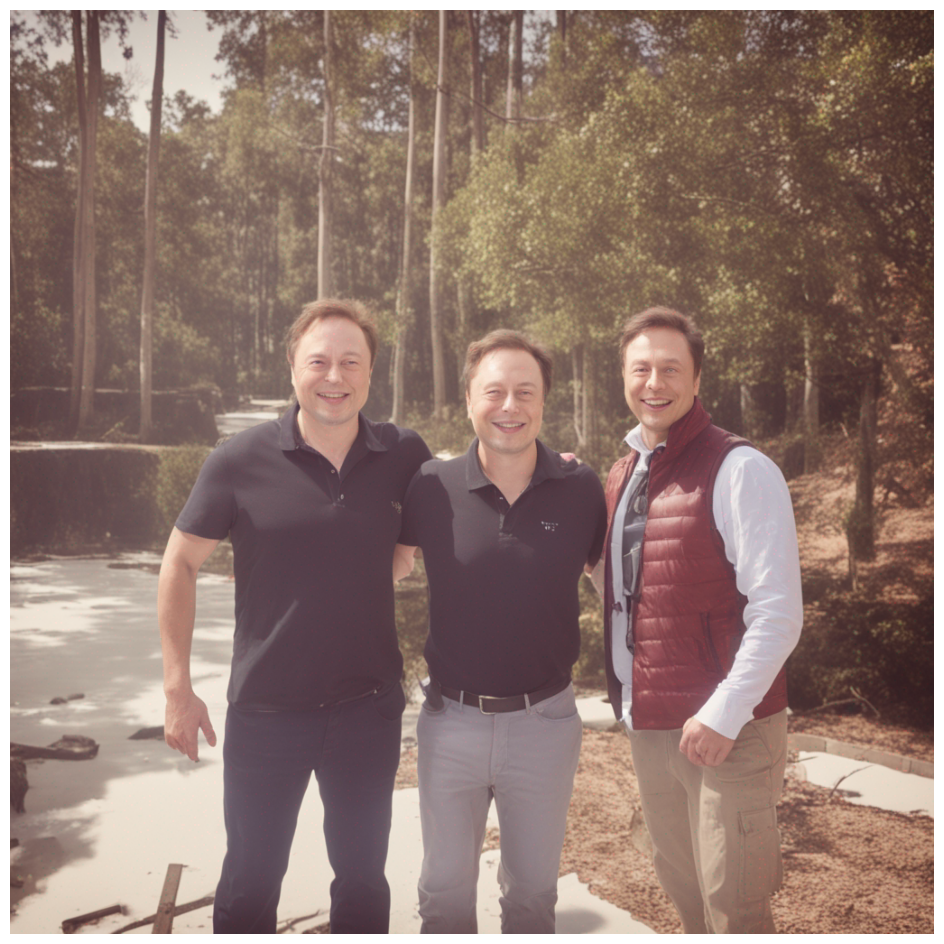

In [ ]:
prompt = "Photo of bpatel117 with Elon Musk, tech entrepreneur, Tesla CEO, SpaceX founder, business event, innovation, discussion"

seed = 42
generator = torch.Generator("cuda").manual_seed(seed)
image = pipe(prompt=prompt, generator=generator,num_inference_steps=300).images[0]
image = refiner(prompt=prompt, generator=generator, image=image).images[0]
image.save(f"generated_image2_1.png")
display_img_and_prompt(image,prompt)

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

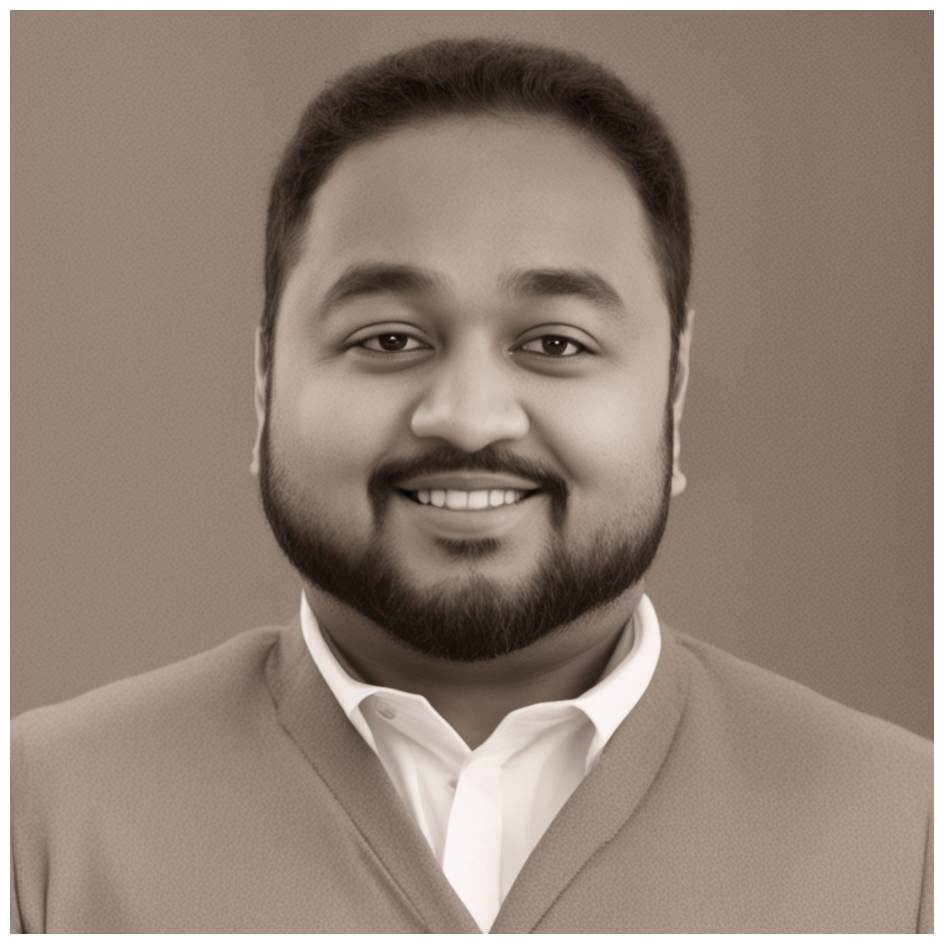

In [ ]:
prompt = "Professional photo of bpatel117, LinkedIn profile picture, formal attire, confident pose, neutral background, headshot"

seed = 42
generator = torch.Generator("cuda").manual_seed(seed)
image = pipe(prompt=prompt, generator=generator,num_inference_steps=300).images[0]
image = refiner(prompt=prompt, generator=generator, image=image, num_inference_steps=100).images[0]
image.save(f"generated_image3_1.png")
display_img_and_prompt(image,prompt)

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

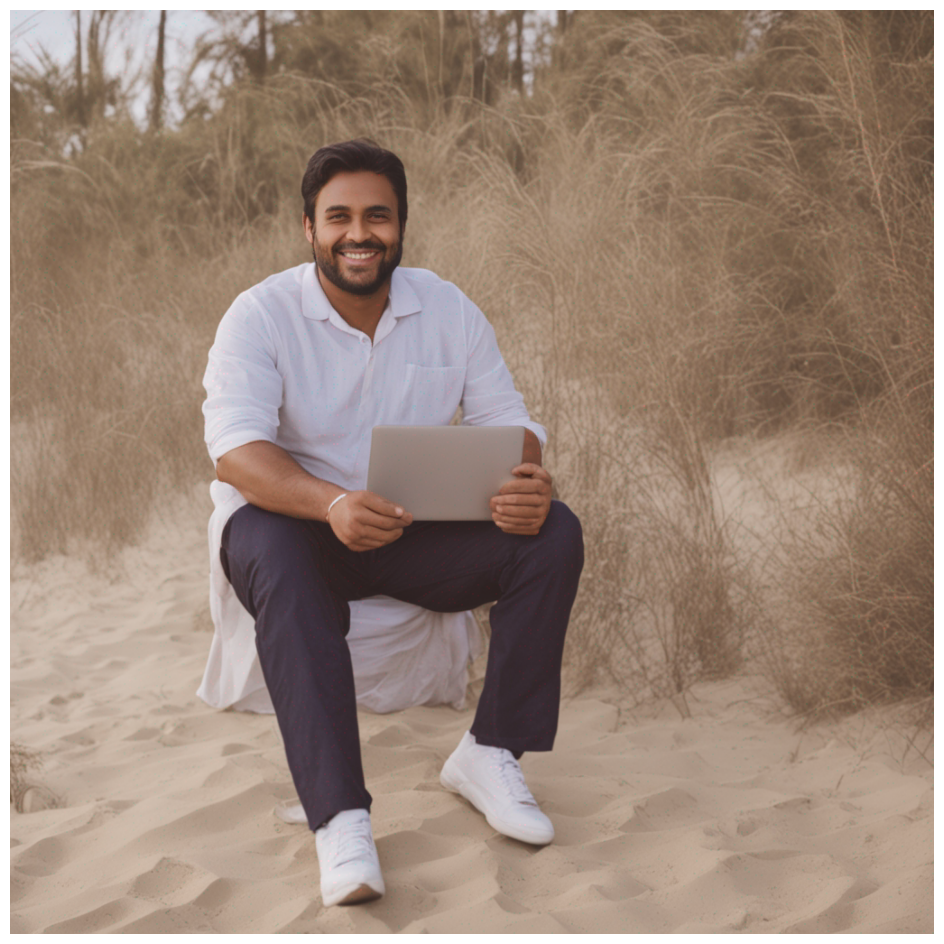

In [ ]:
prompt = "Formal photo of bpatel117 on a beach, smiling, relaxed pose, casual attire, natural light, serene background"

seed = 42
generator = torch.Generator("cuda").manual_seed(seed)
image = pipe(prompt=prompt, generator=generator,num_inference_steps=300).images[0]
image = refiner(prompt=prompt, generator=generator, image=image,num_inference_steps=100).images[0]
image.save(f"generated_image4_1.png")
display_img_and_prompt(image,prompt)

In [ ]:
prompt = "Photo of bpatel117, Indian attire, wedding celebration, fun, joy, traditional clothes, festive occasion, happiness"

seed = 42
generator = torch.Generator("cuda").manual_seed(seed)
image = pipe(prompt=prompt, generator=generator,num_inference_steps=300).images[0]
image = refiner(prompt=prompt, generator=generator, image=image, num_inference_steps=300).images[0]
image.save(f"generated_image5_1.png")
display_img_and_prompt(image,prompt)

  0%|          | 0/300 [00:00<?, ?it/s]

In [ ]:
prompt = "Photo of bpatel117 with Gal Gadot, beach setting, selfie, casual attire, celebrities, relaxed, natural light"

seed = 42
generator = torch.Generator("cuda").manual_seed(seed)
image = pipe(prompt=prompt, generator=generator, num_inference_steps=300).images[0]
image = refiner(prompt=prompt, generator=generator, image=image,num_inference_steps=300).images[0]
image.save(f"generated_image6_1.png")
display_img_and_prompt(image,prompt)

In [ ]:
prompts = [
"Photo of bpatel117 with Narendra Modi, Indian Prime Minister, formal meeting, political event, dignitaries, handshake",
"Photo of bpatel117 with Elon Musk, tech entrepreneur, Tesla CEO, SpaceX founder, business event, innovation, discussion",
"Professional photo of bpatel117, LinkedIn profile picture, formal attire, confident pose, neutral background, headshot",
"Formal photo of bpatel117 on a beach, smiling, relaxed pose, casual attire, natural light, serene background",
"Photo of bpatel117, Indian attire, wedding celebration, fun, joy, traditional clothes, festive occasion, happiness",
"Photo of bpatel117 with Gal Gadot, beach setting, selfie, casual attire, celebrities, relaxed, natural light"
]